In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [2]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
  
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

In [6]:
X, Y

(tensor([[ 0,  0,  0],
         [ 0,  0,  5],
         [ 0,  5, 13],
         ...,
         [26, 26, 25],
         [26, 25, 26],
         [25, 26, 24]]),
 tensor([ 5, 13, 13,  ..., 26, 24,  0]))

In [7]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [8]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
# random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


torch.Size([182503, 3]) torch.Size([182503])
torch.Size([22860, 3]) torch.Size([22860])
torch.Size([22783, 3]) torch.Size([22783])


In [9]:
C = torch.randn((27, 2))

In [27]:
# Different ways of indexing C
print("C.shape :", C.shape)
print("C[5] =",C[5]) # straight forward
one_hot = F.one_hot(torch.tensor(5), num_classes=27).float() @ C
print("F.one_hot(torch.tensor(5), num_classes=27).float() @ C :=", one_hot)
print('X.shape', X.shape)
print('C[X].shape', C[X].shape)
C[X]

C.shape : torch.Size([27, 2])
C[5] = tensor([0.0485, 1.0898])
F.one_hot(torch.tensor(5), num_classes=27).float() @ C := tensor([0.0485, 1.0898])
X.shape torch.Size([228146, 3])
C[X].shape torch.Size([228146, 3, 2])


tensor([[[-0.2172, -0.4119],
         [-0.2172, -0.4119],
         [-0.2172, -0.4119]],

        [[-0.2172, -0.4119],
         [-0.2172, -0.4119],
         [ 0.0485,  1.0898]],

        [[-0.2172, -0.4119],
         [ 0.0485,  1.0898],
         [-1.6340, -0.4981]],

        ...,

        [[-1.7143,  2.0407],
         [-1.7143,  2.0407],
         [ 0.3552,  0.6520]],

        [[-1.7143,  2.0407],
         [ 0.3552,  0.6520],
         [-1.7143,  2.0407]],

        [[ 0.3552,  0.6520],
         [-1.7143,  2.0407],
         [ 0.1717, -2.3573]]])

torch.Tensor

In [11]:
C.shape, X.shape

(torch.Size([27, 2]), torch.Size([228146, 3]))

In [47]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [48]:
emb

tensor([[[-0.2172, -0.4119],
         [-0.2172, -0.4119],
         [-0.2172, -0.4119]],

        [[-0.2172, -0.4119],
         [-0.2172, -0.4119],
         [ 0.0485,  1.0898]],

        [[-0.2172, -0.4119],
         [ 0.0485,  1.0898],
         [-1.6340, -0.4981]],

        ...,

        [[-1.7143,  2.0407],
         [-1.7143,  2.0407],
         [ 0.3552,  0.6520]],

        [[-1.7143,  2.0407],
         [ 0.3552,  0.6520],
         [-1.7143,  2.0407]],

        [[ 0.3552,  0.6520],
         [-1.7143,  2.0407],
         [ 0.1717, -2.3573]]])

In [49]:
# torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]], 1)
# torch.unbind(emb, 1)

In [50]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        ...,
        [26, 26, 25],
        [26, 25, 26],
        [25, 26, 24]])

In [51]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [52]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [53]:
h

tensor([[ 0.9730,  0.9987, -0.0606,  ..., -0.8874, -0.5423,  0.9802],
        [ 0.9793,  0.9576,  0.5843,  ..., -0.4424,  0.2790, -0.4706],
        [ 0.2603,  0.9152,  0.9992,  ..., -0.9920, -0.7702,  0.0671],
        ...,
        [-0.9998, -0.9999, -0.4729,  ..., -0.9920,  0.7864, -0.7814],
        [-0.9991, -1.0000,  0.9711,  ...,  0.9524,  0.9716, -0.9997],
        [-0.5603, -0.0153,  0.6186,  ..., -1.0000, -0.9923,  0.9995]])

In [54]:
h.shape

torch.Size([228146, 100])

In [55]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [56]:
logits = h @ W2 + b2

In [57]:
logits.shape

torch.Size([228146, 27])

In [58]:
counts = logits.exp()

In [59]:
prob = counts / counts.sum(1, keepdims=True)

In [60]:
prob.shape

torch.Size([228146, 27])

In [61]:
prob[torch.arange(228146), Y]

tensor([7.6407e-06, 3.5914e-06, 2.2212e-12,  ..., 1.5750e-07, 4.1936e-07,
        1.3851e-05])

In [62]:
loss = -prob[torch.arange(228146), Y].log().mean()
loss

tensor(16.9152)

In [63]:
# ------------ now made respectable :) ---------------

In [38]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182549, 3]), torch.Size([182549]))

In [64]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
# C = torch.randn((27, 10))
# W1 = torch.randn((30, 200))
# b1 = torch.randn(200)
# W2 = torch.randn((200, 27))
# b2 = torch.randn(27)
# parameters = [C, W1, b1, W2, b2]

In [65]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [66]:
for p in parameters:
  p.requires_grad = True

In [67]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [58]:
lri = []
lossi = []
stepi = []

In [59]:
for i in range(300000):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  #lr = lrs[i]
  lr = 0.1 if i < 150000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

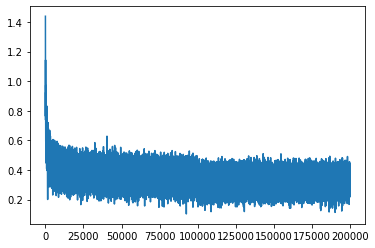

In [60]:
plt.plot(stepi, lossi)

In [61]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1151, grad_fn=<NllLossBackward0>)

In [62]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1727, grad_fn=<NllLossBackward0>)

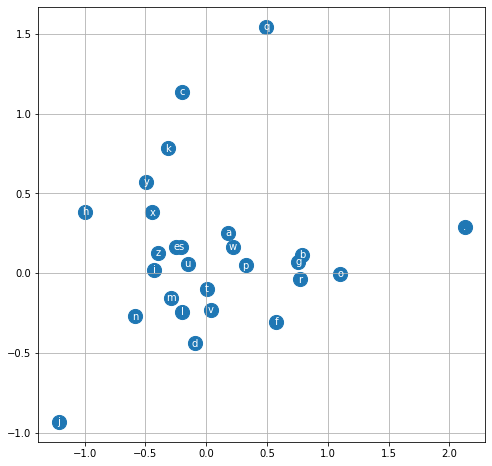

In [63]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [64]:
# training split, dev/validation split, test split
# 80%, 10%, 10%

In [65]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [66]:
C[torch.tensor([context])]

tensor([[[ 2.1248,  0.2917,  0.4133, -0.2410,  0.7929, -0.0226, -1.4534,
           0.8227,  0.5142,  1.3942],
         [ 2.1248,  0.2917,  0.4133, -0.2410,  0.7929, -0.0226, -1.4534,
           0.8227,  0.5142,  1.3942],
         [ 2.1248,  0.2917,  0.4133, -0.2410,  0.7929, -0.0226, -1.4534,
           0.8227,  0.5142,  1.3942]]], grad_fn=<IndexBackward0>)

In [68]:


# sample from the model
# g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(25):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      #ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      ix = torch.multinomial(probs, num_samples=1).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

atan.
kyn.
yun.
oligarsgenna.
fin.
sandi.
kyova.
jerra.
anna.
erius.
solaya.
prosse.
sure.
aadelleua.
rayce.
bortleone.
katyvorayleighlo.
obell.
kemi.
angy.
perry.
romah.
rayid.
camina.
ania.
